<div style="background-image:url(images/meschede-seismic-waves.png); padding: 10px 30px 20px 30px; background-size:cover; background-opacity:50%; border-radius:5px; background-position: 0px -200px">
<p style="float:right; margin-top:20px; padding: 20px 60px 0px 10px; background:rgba(255,255,255,0.75); border-radius:10px;">
<img width="400px" src=images/obspy_logo_full_524x179px.png?raw=true>
</p>

<h1 style="color:#BBB; padding-bottom: 80px">MESS 2016 - Practicals</h1>

<h2 style="color:#FFF; padding-bottom: 30px">Noise Estimation<br/>PPSD + I95</h2>

</div>

### Please execute first cell to have plots show up inline (and scrollable/zoomable)
### If you are unclear about how to use some ObsPy function: use search box at http://docs.obspy.org

In [1]:
import matplotlib.pyplot as plt
plt.switch_backend("nbagg")
plt.style.use("bmh")

# A) PPSD
 * read waveform data from file `BW.BDGS..BHN.D.2016.035`
 * read corresponding station metadata from file `station_BDGS.stationxml`
 * print info on both waveforms and station metadata
 * (if `basemap` package is installed) plot location of station using the inventory's `plot()` method

1 Trace(s) in Stream:
BW.BDGS..BHN | 2016-02-04T00:00:22.507499Z - 2016-02-05T00:00:15.057499Z | 20.0 Hz, 1727852 samples
Inventory created at 2016-01-25T15:36:31.100000Z
	Created by: fdsn-stationxml-converter/1.0.8
		    http://www.iris.edu/fdsnstationconverter
	Sending institution: GOF
	Contains:
		Networks (1):
			BW
		Stations (1):
			BW.BDGS (Salzbergwerk, Berchtesgaden)
		Channels (6):
			BW.BDGS..BHE, BW.BDGS..BHN, BW.BDGS..BHZ, BW.BDGS..HHE,
			BW.BDGS..HHN, BW.BDGS..HHZ


<IPython.core.display.Javascript object>


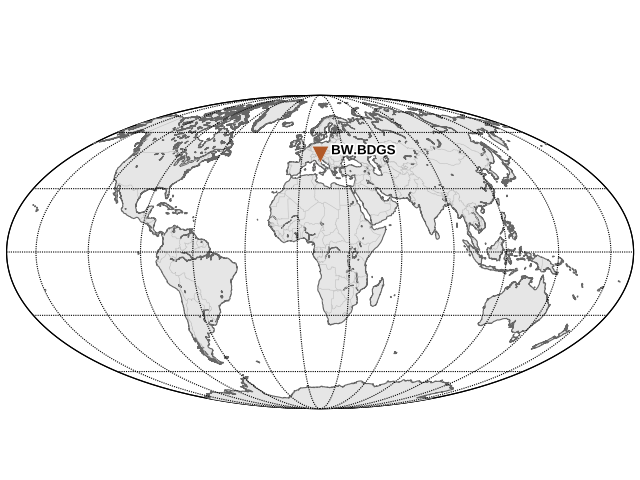

<IPython.core.display.Javascript object>


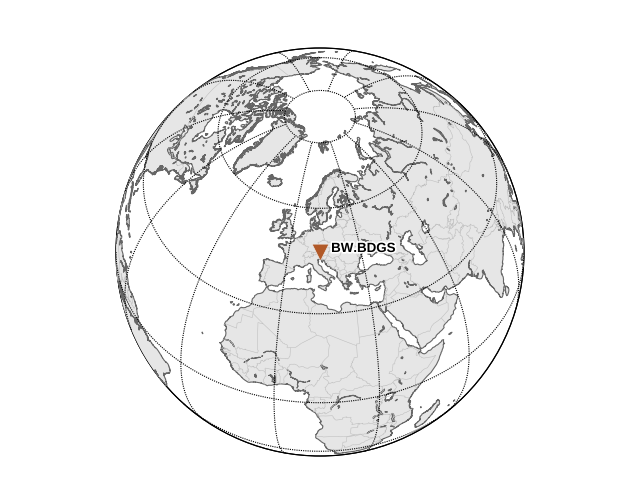

In [2]:
from obspy import read, read_inventory

st = read("data/BW.BDGS..BHN.D.2016.035")
inv = read_inventory("data/station_BDGS.stationxml")

print(st)
print(inv)
inv.plot()
inv.plot(projection="ortho")

 * compute probabilistic power spectral densities using `PPSD` class from obspy.signal, see http://docs.obspy.org/tutorial/code_snippets/probabilistic_power_spectral_density.html (but use the inventory you read from StationXML as metadata)
 * plot the processed `PPSD` (`plot()` method attached to `PPSD` object)

<IPython.core.display.Javascript object>


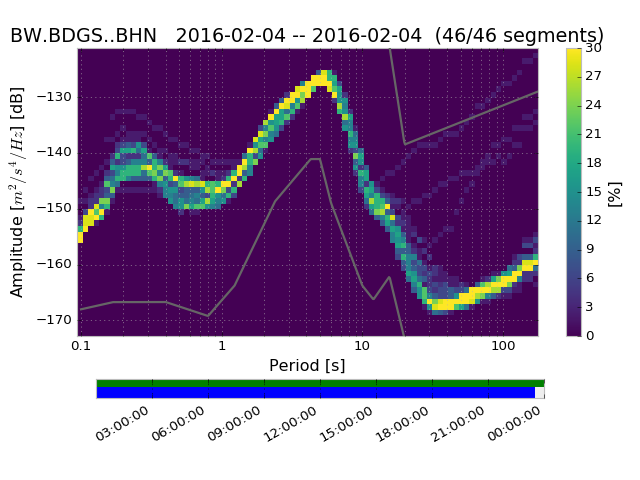

In [3]:
from obspy.signal import PPSD

tr = st[0]
ppsd = PPSD(stats=tr.stats, metadata=inv)

ppsd.add(tr)
ppsd.plot()

Since longer term stacks would need too much waveform data and take too long to compute, I prepared two years continuous data preprocessed for 2 stations on three channels each to play with..

 * `FUR`: LMU geophysical observatory in Fürstenfeldbruck
 * `ROTZ`: Rotzenmühle, low-noise station in Bavarian network)


 * load long term pre-computed PPSD from one of the files `PPSD_(FUR|ROTZ)_HH?.npz` using `PPSD`'s `load_npz()` staticmethod (i.e. it is called directly from the class, not an instance object of the class)
 * plot the PPSD (default is full time-range, depending on how much data and spread is in the data, adjust `max_percentage` option of `plot()` option)
 * do a cumulative plot (which is good to judge non-exceedance percentage dB thresholds)

In [4]:
from obspy.signal import PPSD

ppsd = PPSD.load_npz("data/PPSD_FUR_HHN.npz")

<IPython.core.display.Javascript object>


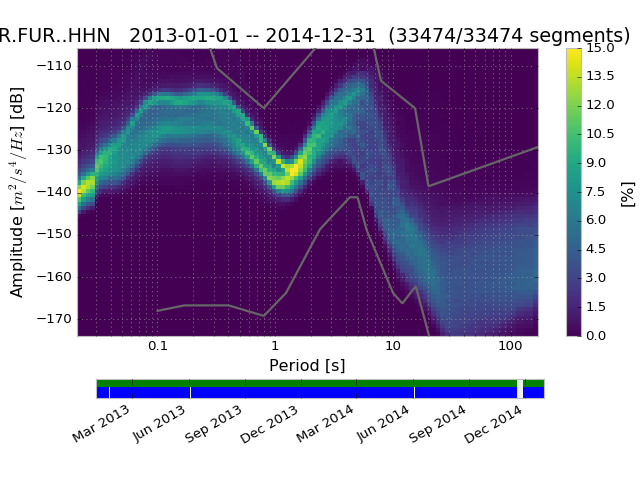

<IPython.core.display.Javascript object>


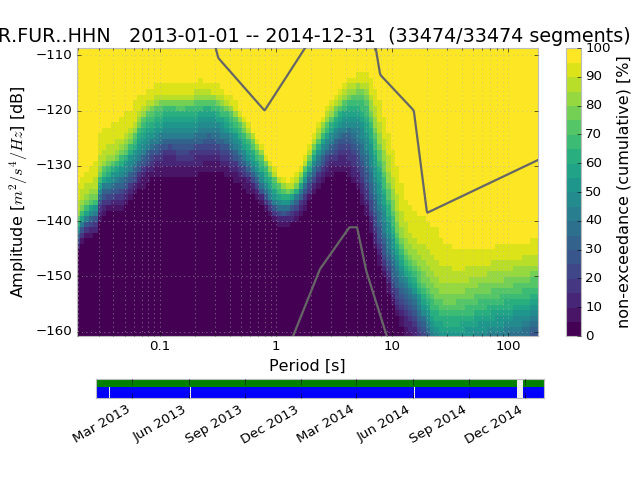

In [5]:
ppsd.plot(max_percentage=15)
ppsd.plot(cumulative=True)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * nighttime stack, daytime stack
 * (Gold card members: Use the `callback` option and use some crazy custom callback function in `calculate_histogram()`, e.g. stack together all data from birthdays in your family.. or all German holidays + Sundays in the time span.. or from dates of some bands' concerts on a tour.. etc.)

<IPython.core.display.Javascript object>


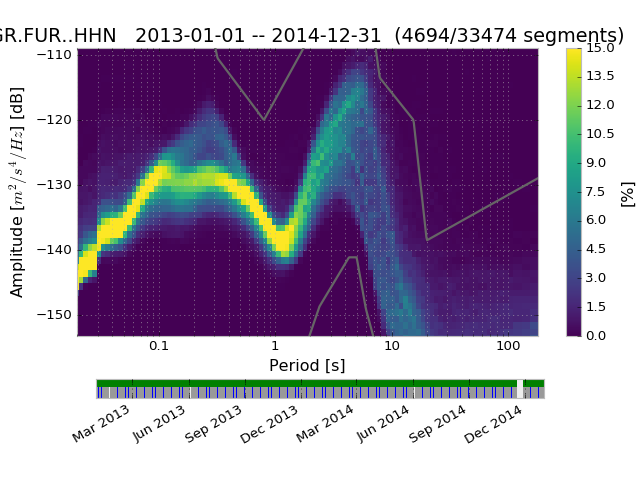

<IPython.core.display.Javascript object>


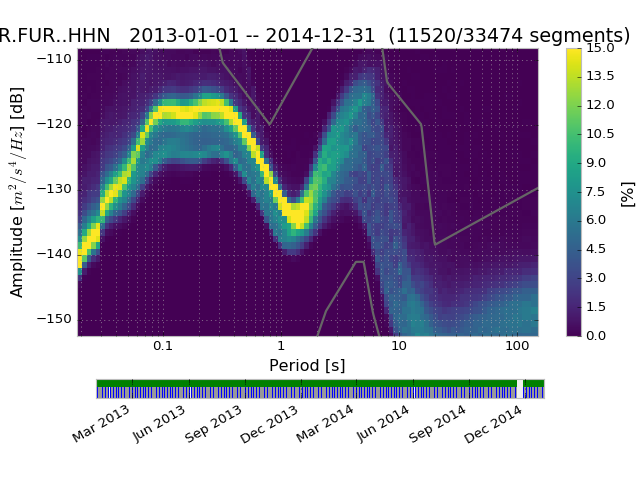

In [6]:
ppsd.calculate_histogram(time_of_weekday=[(-1, 0, 2), (-1, 22, 24)])
ppsd.plot(max_percentage=15)
ppsd.calculate_histogram(time_of_weekday=[(-1, 8, 16)])
ppsd.plot(max_percentage=15)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * weekdays stack, weekend stack

<IPython.core.display.Javascript object>


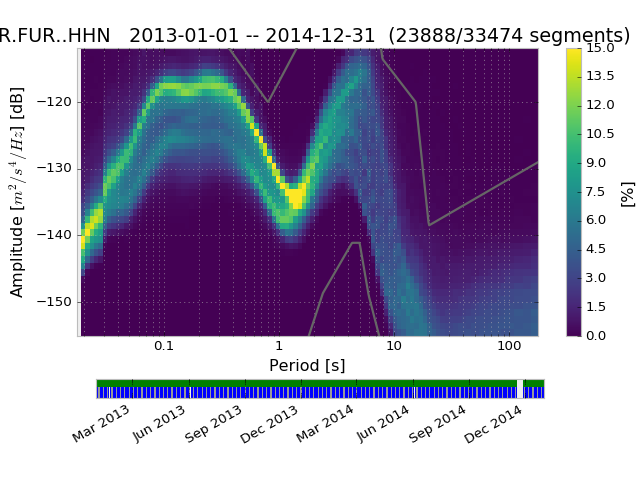

<IPython.core.display.Javascript object>


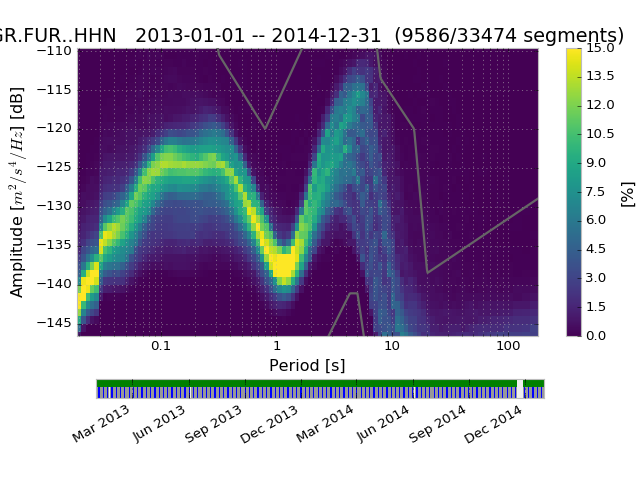

In [7]:
ppsd.calculate_histogram(time_of_weekday=[(1, 0, 24), (2, 0, 24), (3, 0, 24), (4, 0, 24), (5, 0, 24)])
ppsd.plot(max_percentage=15)
ppsd.calculate_histogram(time_of_weekday=[(6, 0, 24), (7, 0, 24)])
ppsd.plot(max_percentage=15)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * seasonal stacks (e.g. northern hemisphere autumn vs. spring/summer, ...)

<IPython.core.display.Javascript object>


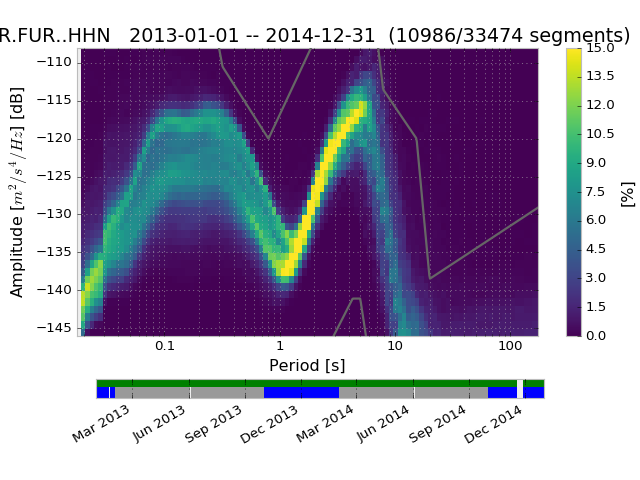

<IPython.core.display.Javascript object>


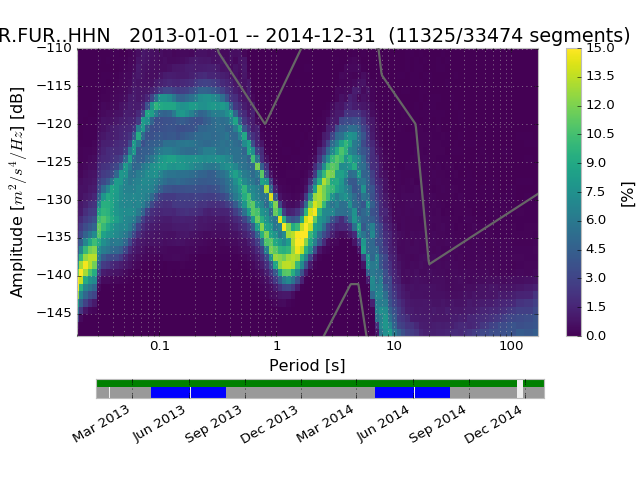

In [8]:
ppsd.calculate_histogram(month=[10, 11, 12, 1])
ppsd.plot(max_percentage=15)
ppsd.calculate_histogram(month=[4, 5, 6, 7])
ppsd.plot(max_percentage=15)

 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * stacks by specific month
   * maybe even combine several of above restrictions.. (e.g. only nighttime on weekends)

# B) I95
 * read waveform data from file `noise_UH2_EHZ.mseed`
 * read station metadata from file `station_UH2.stationxml`
 * print info on waveforms

In [9]:
from obspy import read, read_inventory

st = read("data/noise_UH2_EHZ.mseed")
inv = read_inventory("data/station_UH2.stationxml")
print(st)

1 Trace(s) in Stream:
BW.UH2..EHZ | 2011-03-10T01:59:59.999999Z - 2011-03-10T04:59:59.999999Z | 200.0 Hz, 2160001 samples


 * work with a copy of the first trace in the stream
 * use inventory with the trace's [`remove_response(..) (see docs!)`](http://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html) method to remove the frequency response from the data (use `plot=True` to visualize what is going on in frequency domain), going to ground velocity (ending up in `m/s`)
 * after instrument correction filter to a frequency band of choice (usually something like 0.5-20 Hz for local to regional event detection)

<IPython.core.display.Javascript object>


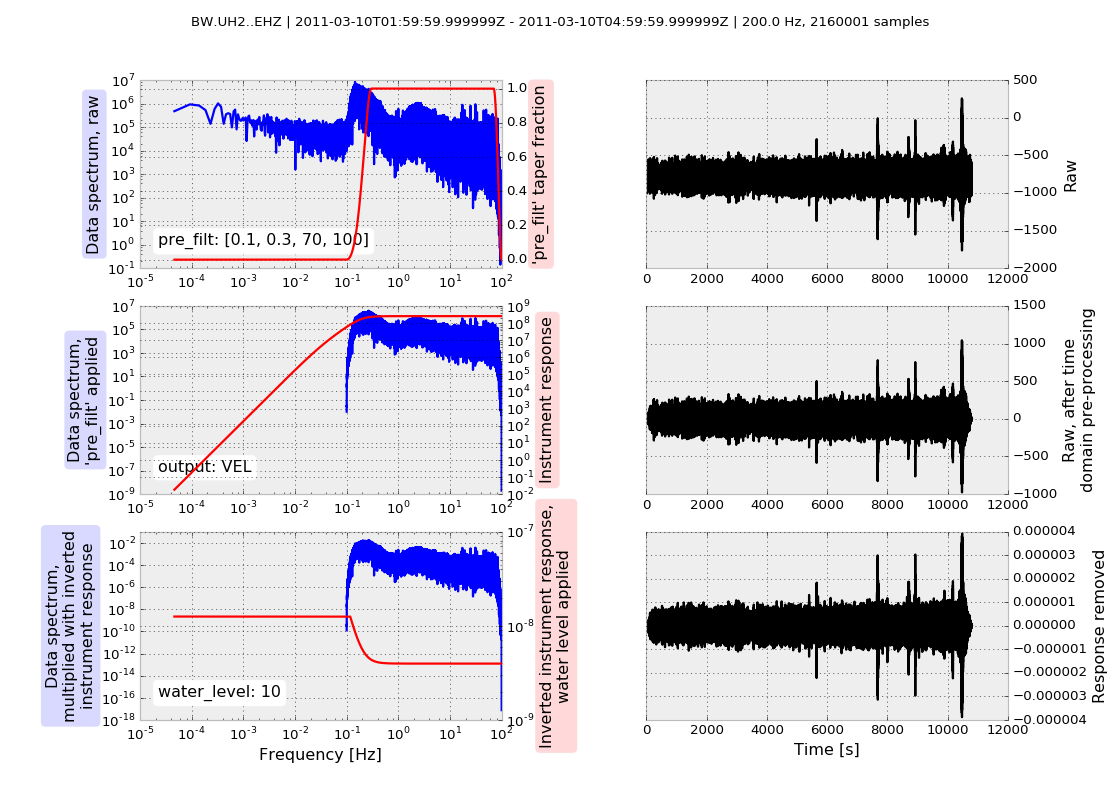

In [10]:
tr = st[0].copy()

tr.remove_response(inventory=inv, output="VEL", water_level=10, pre_filt=[0.1, 0.3, 70, 100], plot=True)
tr.filter("bandpass", freqmin=0.5, freqmax=20)

# somehow we need a plt.show() call at end to bring up the figure of the response removal..
import matplotlib.pyplot as plt
plt.show()

 * multiply the trace's underlying data array with `1e9` to get to `nm/s`
 * use numpy's `abs()` and `percentile()` functions, to compute the 95th percentile of absolute values in the data (due to the response removal and filtering the data should already be zero-mean -- which is of course a requirement)
 * print the I95 value of the 3 hours of data

In [12]:
import numpy as np

data = tr.data * 1e9

i95 = np.percentile(np.abs(data), 95)
print("I95: %i nm/s" % i95)

I95: 306 nm/s


 * here we do the I95 calculation in a smaller moving window over time to get some statistics...

<IPython.core.display.Javascript object>


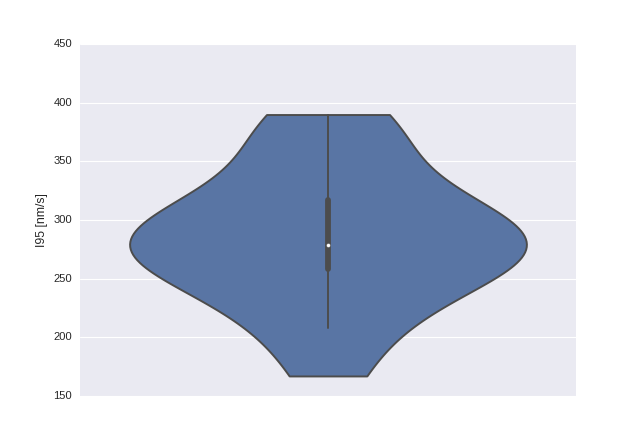

<IPython.core.display.Javascript object>


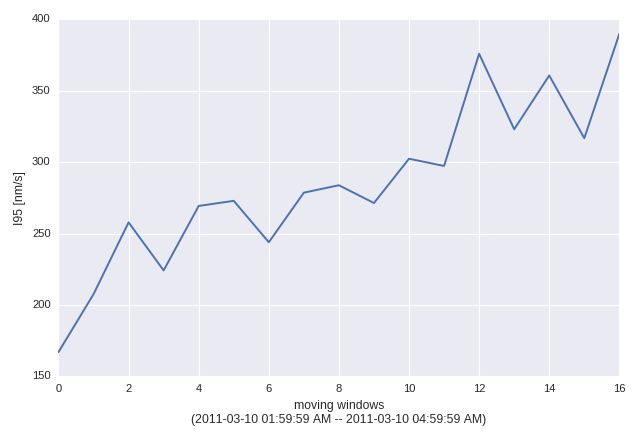

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn
from obspy import read, read_inventory

st = read("data/noise_UH2_EHZ.mseed")
inv = read_inventory("data/station_UH2.stationxml")

tr = st[0]

tr.remove_response(inventory=inv, output="VEL", water_level=10, pre_filt=[0.1, 0.3, 70, 100])
tr.filter("bandpass", freqmin=0.5, freqmax=20)

t = tr.stats.starttime
# 10 minute moving window
step = 10 * 60
i95_list = []

while t + step < tr.stats.endtime:
    data = np.abs(tr.slice(t, t+step)) * 1e9
    i95 = np.percentile(data, 95)
    i95_list.append(i95)
    t += step

plt.figure()
try:
    import seaborn
except ImportError:
    plt.violinplot(i95_list)
else:
    seaborn.violinplot(i95_list, orient="v", cut=0)
plt.ylabel("I95 [nm/s]")
plt.figure()
plt.plot(i95_list)
plt.xlabel("moving windows\n({} -- {})".format(
    tr.stats.starttime.strftime("%F %r"), tr.stats.endtime.strftime("%F %r")))
plt.ylabel("I95 [nm/s]")
plt.tight_layout()
plt.show()